
<center><h1>TASK 2 INTERMEDIATE LEVEL TASK</h1></center>
<center><h1>Task 2 : Prediction using Decision Tree  Algorithm</h1></center>
<center><h2 style="color: lavender ;background-color:Green;" > LetsGrowMore <br>
LGMVIP- JULY_2023 Data Science<br> By : Ayesha Nazir Butt </h2></center>

 **Create the Decision Tree classifier and visualize it graphically.**


**1) IMPORTING THE LIBRARIES**

Let's first load the required libraries.

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

**2) LOADING THE DATASET**

Let's first load the Iris dataset using panda's read CSV function.
 

In [40]:
data = pd.read_csv('Iris.csv')
df = pd.DataFrame(data)
data.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
14,15,5.8,4.0,1.2,0.2,Iris-setosa
60,61,5.0,2.0,3.5,1.0,Iris-versicolor
77,78,6.7,3.0,5.0,1.7,Iris-versicolor
121,122,5.6,2.8,4.9,2.0,Iris-virginica
131,132,7.9,3.8,6.4,2.0,Iris-virginica


**3) DATA DESCRIPTION**

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [42]:
df.drop('Id',axis=1,inplace=True)
df.sample(4)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
62,6.0,2.2,4.0,1.0,Iris-versicolor
90,5.5,2.6,4.4,1.2,Iris-versicolor
135,7.7,3.0,6.1,2.3,Iris-virginica
86,6.7,3.1,4.7,1.5,Iris-versicolor


In [43]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [44]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

There are no missng values in this dataset.

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


We can see that, only 'species' column is object type and all other columns are float type

In [46]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


From this we can conclude that mean length of 'sepal_width' and 'petal_length' is some what similar and 'sepal_length' has maximum length. Also,'petal_length' has maximum deviation.

# **Data Visualization**

In [54]:
def plot_data(col):
    #sns.stripplot(x='Species',y=col,data=df,color='white')
    #sns.violinplot(x='Species',y=col,data=df)
    sns.barplot(x='Species',y=col,data=df,palette='magma')
    plt.title('Species vs {}'.format(col))

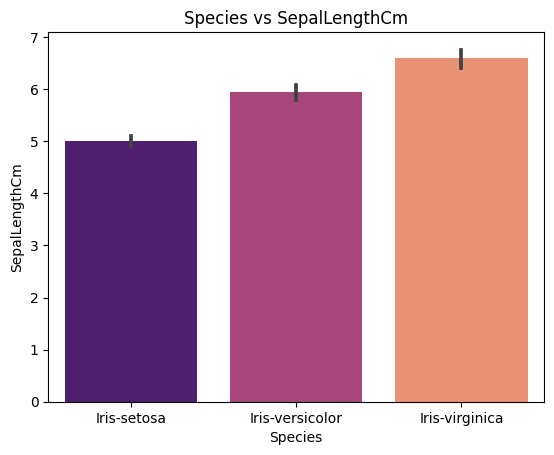

In [55]:
plot_data('SepalLengthCm')

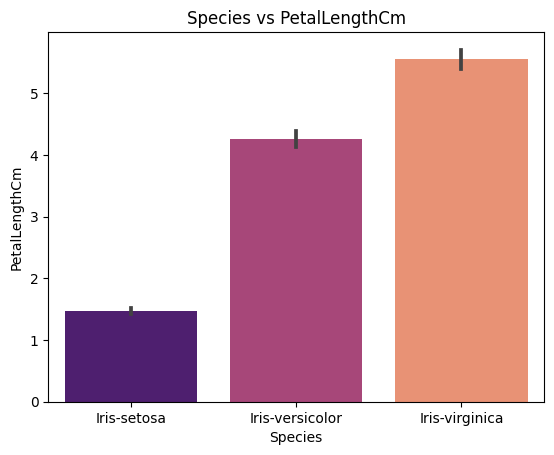

In [56]:
plot_data('PetalLengthCm')

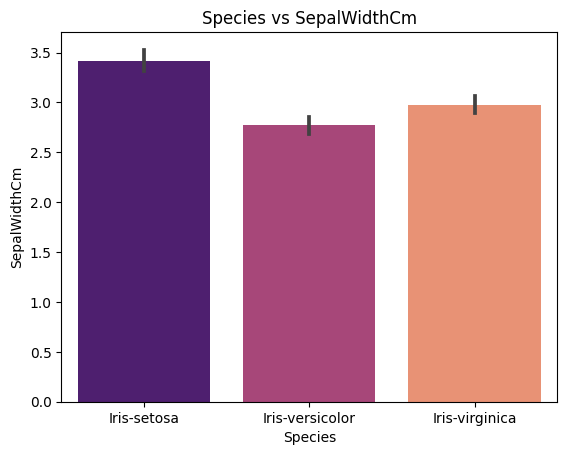

In [57]:
plot_data('SepalWidthCm')

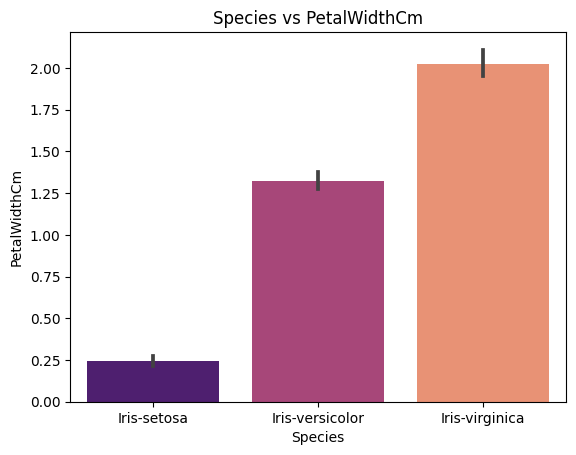

In [58]:
plot_data('PetalWidthCm')

/Users/ayeshabutt/micromamba/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


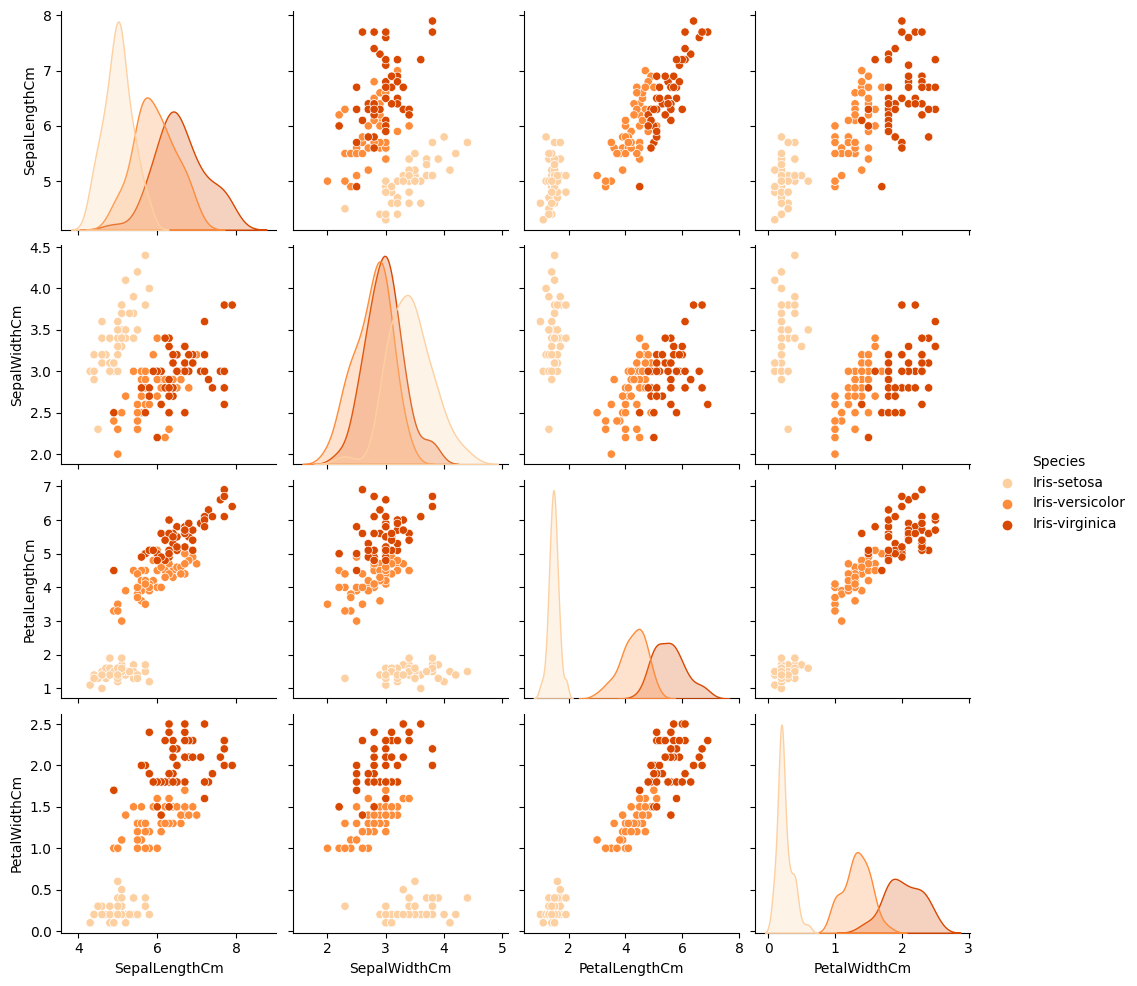

In [59]:
sns.pairplot(df,hue='Species',palette="Oranges")

**Label Encoding**

In [60]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
df['Species'] = encoder.fit_transform(df['Species'])

In [61]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Feature Selection**

Here, you need to divide given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).

In [62]:
X = df.drop(['Species'], axis=1)
y = df['Species']


## Splitting Data

A effective technique for understanding model performance is to divide the dataset into a training set and a test set.
Let's divide the dataset using the train_test_split() technique. You must supply three parameters: features, goal, and test_set size.

In [63]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 0)

In [64]:
X_train.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
110,6.5,3.2,5.1,2.0
129,7.2,3.0,5.8,1.6
34,4.9,3.1,1.5,0.1
128,6.4,2.8,5.6,2.1
79,5.7,2.6,3.5,1.0


In [65]:
y_train.sample(5)

104    2
28     0
68     1
146    2
144    2
Name: Species, dtype: int64

## Build the Decision Tree Model

Let's create a Decision Tree Model using Scikit-learn.

In [66]:
from sklearn import tree
from sklearn import metrics
model = tree.DecisionTreeClassifier().fit(X_train,y_train)

Training Score: 1.0
Predictions:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2 1 1 2 0 2 0 0]


Accuracy Score: 0.9777777777777777
Recall: 0.9814814814814815
Precision: 0.9722222222222222
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
Axes(0.125,0.11;0.62x0.77)


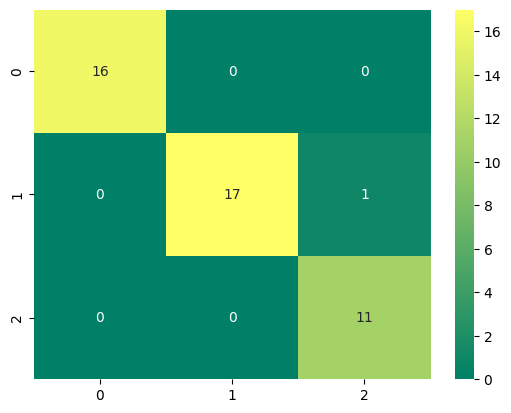

In [68]:
print('Training Score: {}'.format(model.score(X_train, y_train)))

y_pred = model.predict(X_test)
print('Predictions: ', y_pred)
print('\n')

accuracy_score = metrics.accuracy_score(y_test, y_pred)
print('Accuracy Score: {}'.format(accuracy_score))

recall = metrics.recall_score(y_test, y_pred, average='macro')
print('Recall: {}'.format(recall))

precision = metrics.precision_score(y_test, y_pred, average='macro')
print('Precision: {}'.format(precision))

classification_report = metrics.classification_report(y_test, y_pred)
print('Classification Report:\n{}'.format(classification_report))

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n{}'.format(confusion_matrix))

heatmap = sns.heatmap(confusion_matrix, annot=True, cmap='summer')
print(heatmap)


# Decision Tree

The decision tree is the most powerful and widely used classification and prediction tool. A decision tree is a tree structure that looks like a flowchart, with each internal node representing a test on an attribute, each branch representing a test outcome, and each leaf node (terminal node) holding a class label.

## Visualization of Decision Trees



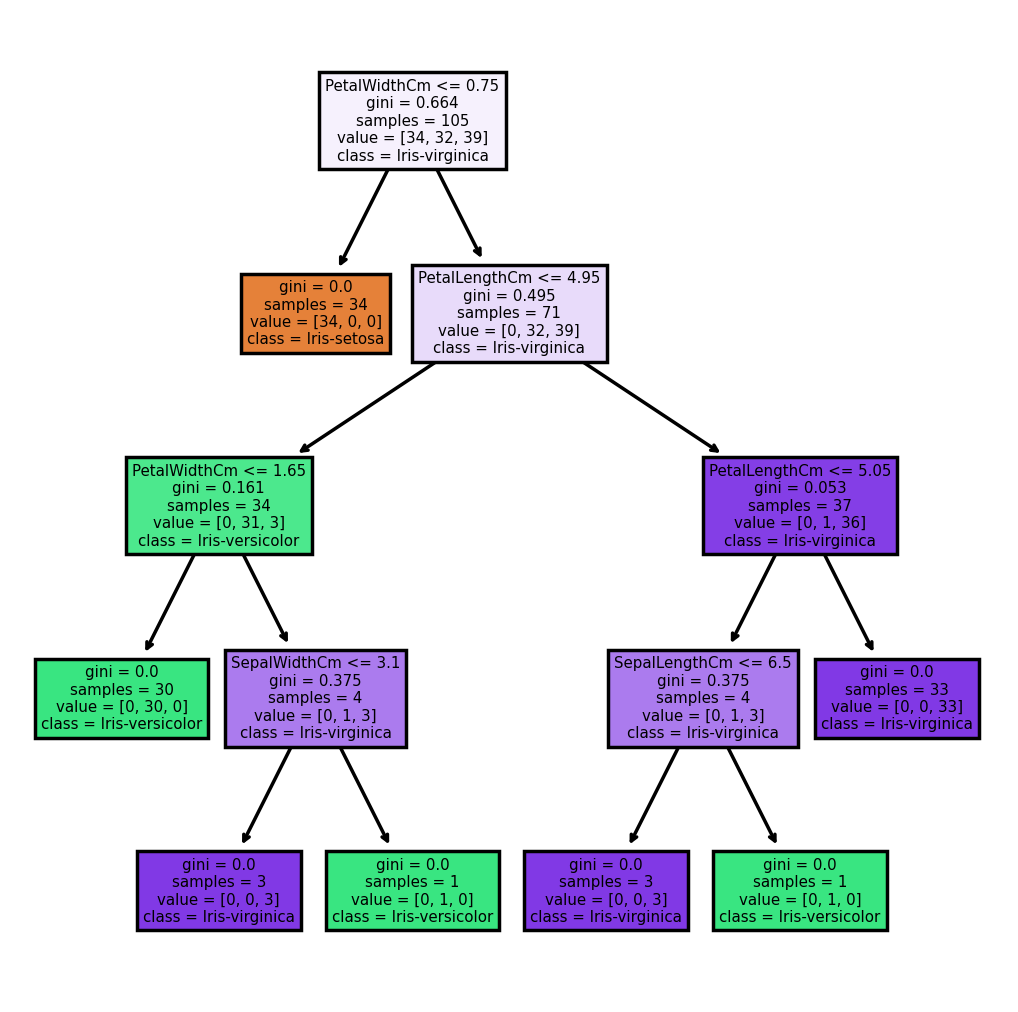

In [70]:
from sklearn import tree
import matplotlib.pyplot as plt

features = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
classes = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

plt.figure(figsize=(5, 5), dpi=250, facecolor='white')
tree.plot_tree(model, feature_names=features, class_names=classes, filled=True)

plt.savefig('IrisTree.png')
plt.show()

In [72]:
df = pd.DataFrame({'y_true': y_test, 'y_predicted': y_pred})
df.reset_index(inplace=True, drop=True)
sample_df = df.sample(10)
print(sample_df)


    y_true  y_predicted
16       1            1
18       0            0
11       1            1
22       0            0
38       1            1
24       2            2
15       0            0
6        0            0
31       1            1
36       0            0


In [73]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
parameters = {'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
grid_model = GridSearchCV(model, param_grid=parameters, cv=3, verbose=2, n_jobs=-1)
grid_model.fit(X_train, y_train)


Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/ayeshabutt/micromamba/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
3 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/ayeshabutt/micromamba/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/ayeshabutt/micromamba/lib/python3.9/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/ayeshabutt/micromamba/lib/python3.9/site-packages/sklearn/base.py", line 637, in _validate_params
    validate_parameter_constraint

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_leaf_nodes': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             verbose=2)

## Evaluation of  Model

Let's Estimate how well the classifier or model predicts the kind of cultivar.

Accuracy may be calculated by comparing actual and anticipated test set values.

In [75]:
y_pred = clf.predict(X_test)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


# In this case, Accuracy=1 means that the classification rate is 1, which is excellent!


## Advantages of Decision Trees:

Decision trees are simple to understand and visualise.
Non-linear patterns are easily captured.
It necessitates less data preparation from the user, such as eliminating the requirement to normalise columns.
It is ideal for variable selection and may be used for feature engineering such as anticipating missing values.
The decision tree has no assumptions about distribution because of the non-parametric nature of the algorithm.
## Disadvantages of Decision Trees:
Decision Trees can be prone to overfitting, resulting in poor generalization to unseen data.
They can be sensitive to small changes in the training data, leading to different tree structures.
Decision Trees may create complex trees that can be difficult to interpret or prone to over-segmentation.
They are not suitable for capturing complex relationships between features.

**Conclusion:**

In this project, we performed classification of Iris flowers using the Decision Tree algorithm. We loaded the dataset, conducted data exploration and preprocessing, and split the data into training and testing sets. A Decision Tree model was then built and evaluated.

The Decision Tree model achieved high accuracy of 98%, accurately classifying the Iris flower species. The model was visualized using a decision tree diagram, providing insights into the decision-making process of the algorithm. Additionally, the confusion matrix revealed that most of the species were correctly classified, with a few misclassifications between Iris-versicolor and Iris-virginica.



<center><h4 style="color:purple ;background-color:powderblue;">In this project, a decision tree classifier was trained and tuned using grid search and cross-validation. The grid search explored different values for the maximum number of leaf nodes. The best model was selected based on cross-validation performance. The decision tree classifier can be a powerful algorithm for classification tasks, and by tuning its hyperparameters, we can improve its performance and find the optimal configuration for the given dataset.</h4></center>







# Thank You!